In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [21]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Product information data loading

In [22]:
os.chdir("/kaggle/input/learnplatform-covid19-impact-on-digital-learning")
df_districts = pd.read_csv("districts_info.csv")

df_products = pd.read_csv("products_info.csv")


In [23]:
list(df_products)

['LP ID',
 'URL',
 'Product Name',
 'Provider/Company Name',
 'Sector(s)',
 'Primary Essential Function']

In [24]:
df_products.dtypes

LP ID                          int64
URL                           object
Product Name                  object
Provider/Company Name         object
Sector(s)                     object
Primary Essential Function    object
dtype: object

In [25]:
# Univariate analysis
product_cols = ["Sector(s)", "Primary Essential Function", "Provider/Company Name"]

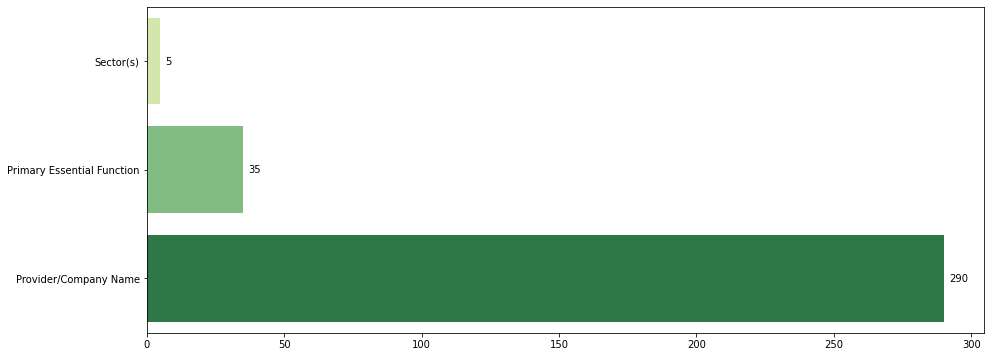

In [26]:
# Number of unique features for each feature
unique = [len(df_products.groupby(c)[c].unique()) 
    for c in product_cols]

plt.figure(figsize=(15,6))
bar = sns.barplot(x=unique, y=product_cols, palette="YlGn")
plt.bar_label(bar.containers[0], padding=5)
plt.show()

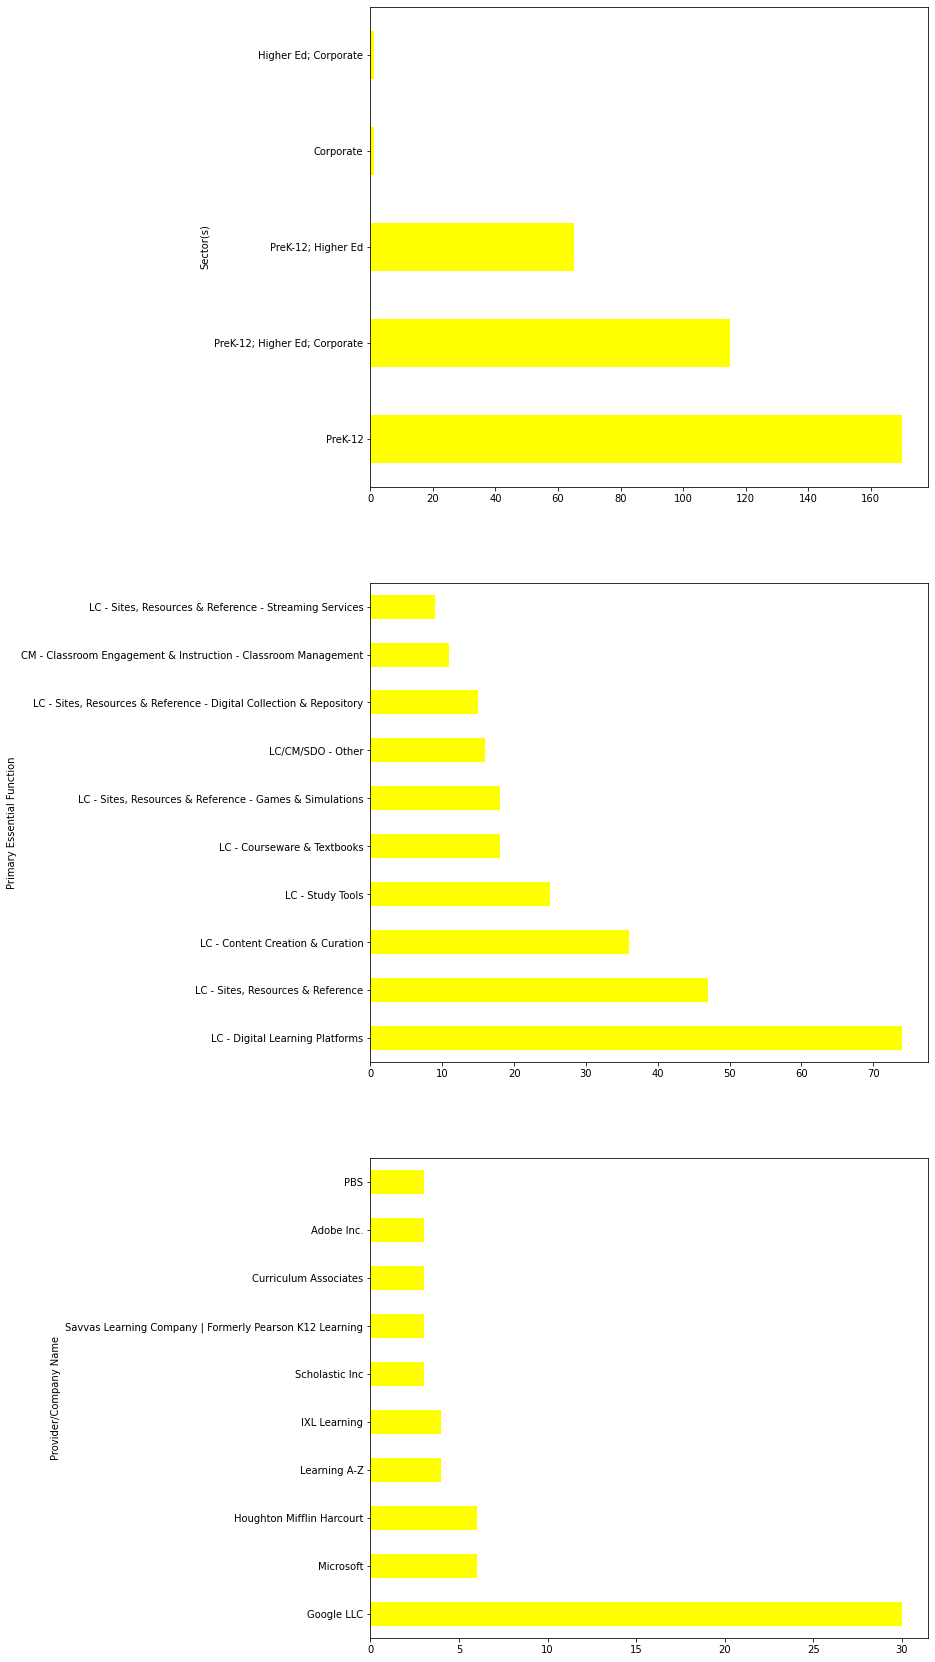

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=3)

for idx, c in enumerate(product_cols):
    df_products.groupby(c)[c].count().sort_values(ascending=False)[:10].plot.barh(ax=ax[idx], figsize=(10, 30), color='Yellow')

# District info


In [28]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


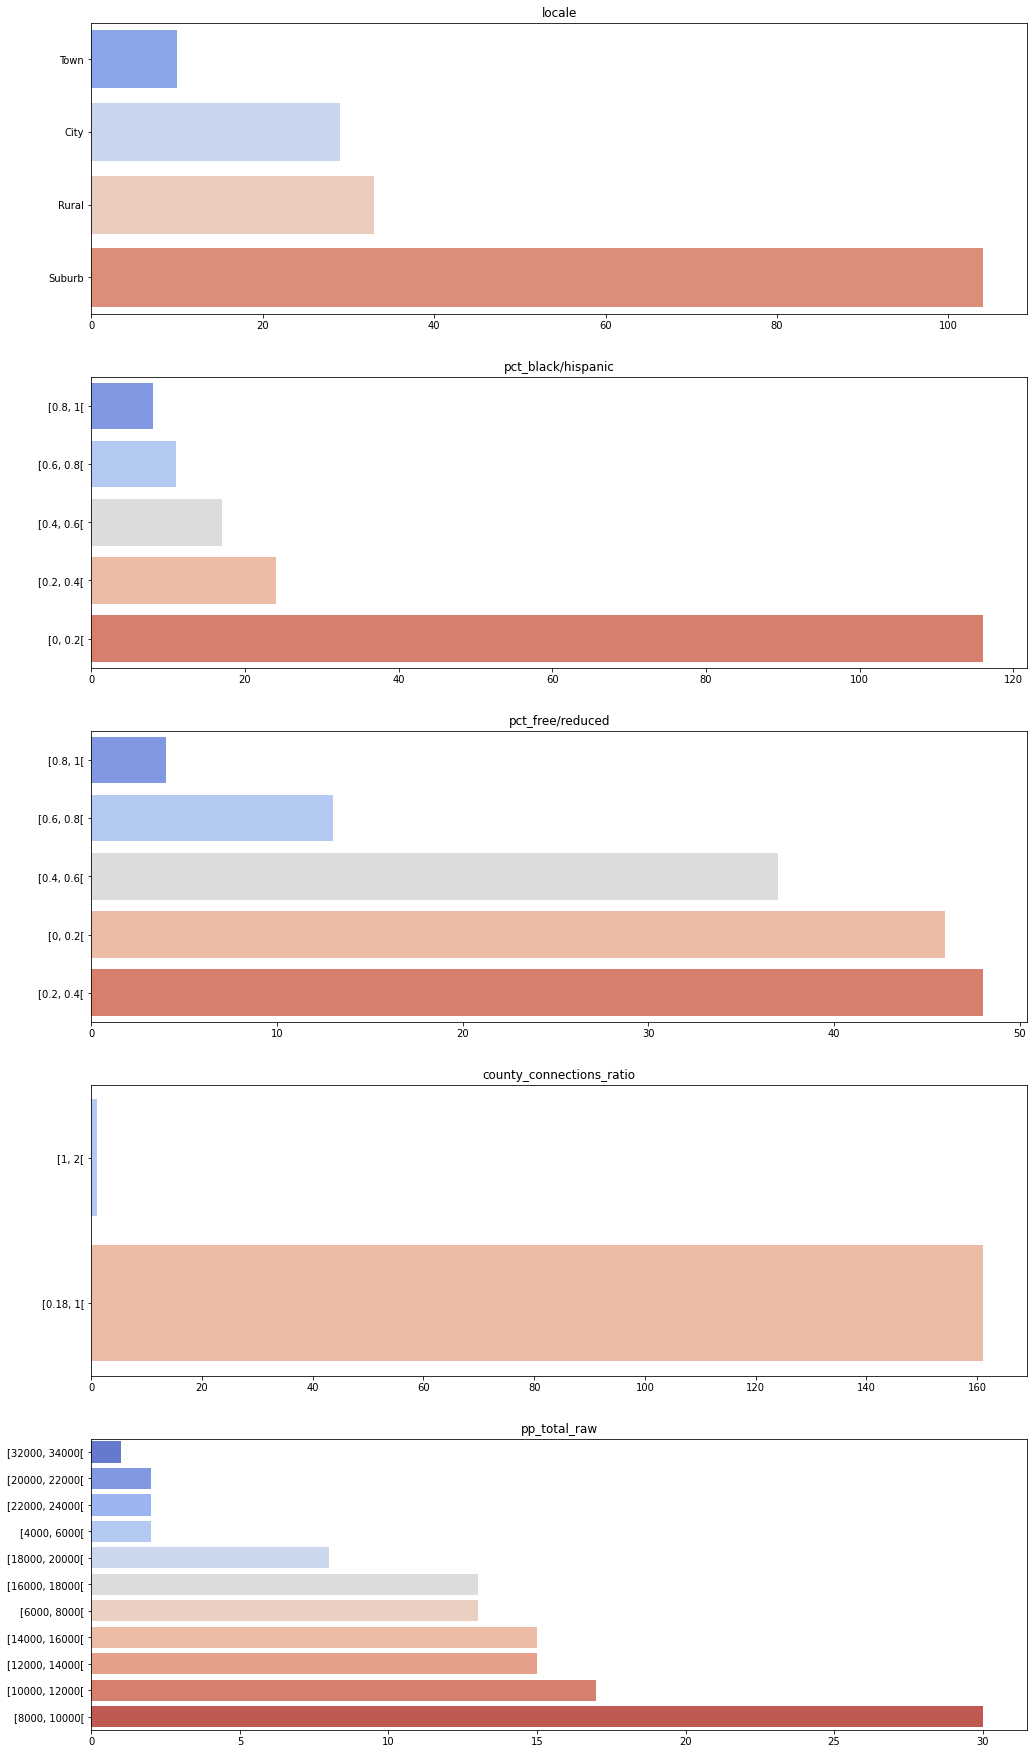

In [29]:
# Univariate analysis

district_cols = ["locale", "pct_black/hispanic", "pct_free/reduced", "county_connections_ratio", "pp_total_raw"]

fig, ax = plt.subplots(nrows=len(district_cols), ncols=1, figsize=(15, 25))

for i in range(len(district_cols)):
    df = df_districts[district_cols[i]].value_counts().sort_values(ascending=True)
    sns.barplot(x=df.values, y=df.index, palette="coolwarm", ax=ax[i])
    ax[i].set_title(district_cols[i])
    
fig.tight_layout(pad=3)

Most of the school districts are in suburb areas. Suburban living is disadvantageous because it takes longer to reach most destinations. Given the chance to attend virtually should be advantageous. I wonder if students from suburbans were the most accessing the learning platforms. 



columns - pct_black/hispanic, pct_free/reduced, county_connections_ratio and pp_total_raw

]a,b[ = { x∈R : a<x<b}

[a,b[ = {x∈R:a≤x<b}

all values are in this format ex: [0.2, 0.4[ -> 0.2<= x < 0.4

]a,b] = {x∈R:a<x≤b}

In [30]:
# transformation of pct_black/hispanic and pct_free/reduced
distcrict_copy=df_districts.copy()
df_districts.dropna(inplace=True)
df_districts['pct_black/hispanic']=df_districts['pct_black/hispanic'].apply(lambda x :float(x.split(',')[0][1:])+0.1)

df_districts['pct_free/reduced']=df_districts['pct_free/reduced'].apply(lambda x :float(x.split(',')[0][1:])+0.1)
df_districts=df_districts.reset_index()
df_districts.drop(labels='index',inplace=True,axis=1)
df_districts

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,0.1,0.3,"[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,0.1,0.1,"[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,0.1,0.5,"[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,0.3,0.3,"[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
83,3732,Michigan,Suburb,0.5,0.5,"[0.18, 1[","[12000, 14000["
84,3266,Utah,Town,0.1,0.5,"[0.18, 1[","[10000, 12000["
85,1705,Washington,City,0.3,0.5,"[0.18, 1[","[12000, 14000["
86,9515,New York,Rural,0.1,0.5,"[0.18, 1[","[18000, 20000["


In [31]:
# transformation of county_connections_ratio and pp_total_raw
df_districts['pp_total_raw']=df_districts['pp_total_raw'].apply(lambda x :float(x.split(',')[0][1:])+1000)
df_districts['county_connections_ratio']=df_districts['county_connections_ratio'].apply(lambda x: float(x.split(',')[0][1:])+0.1)

df_districts

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.28,15000.0
1,4921,Utah,Suburb,0.1,0.3,0.28,7000.0
2,5987,Wisconsin,Suburb,0.1,0.1,0.28,11000.0
3,3710,Utah,Suburb,0.1,0.5,0.28,7000.0
4,7177,North Carolina,Suburb,0.3,0.3,0.28,9000.0
...,...,...,...,...,...,...,...
83,3732,Michigan,Suburb,0.5,0.5,0.28,13000.0
84,3266,Utah,Town,0.1,0.5,0.28,11000.0
85,1705,Washington,City,0.3,0.5,0.28,13000.0
86,9515,New York,Rural,0.1,0.5,0.28,19000.0


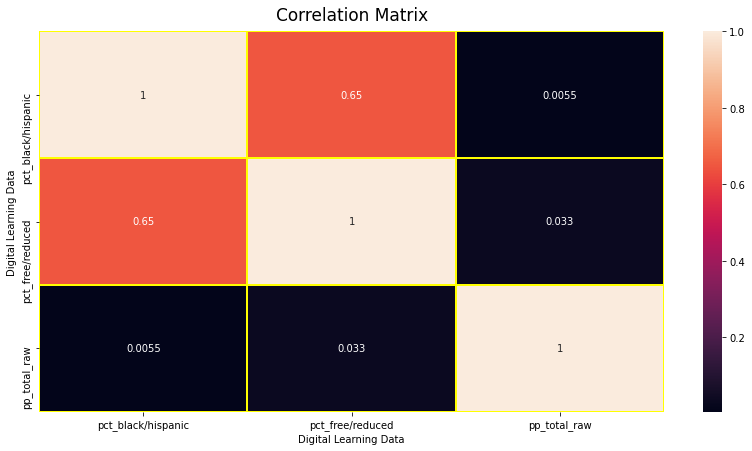

In [32]:
# Creating dataframe for correlation
df_corr = df_districts[['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw']]
# Visualization of the correlation table
correlation = df_corr.corr()
plt.figure(figsize=(14,7))
sns.heatmap(correlation, linecolor='Yellow',linewidths=0.1, annot=True)
plt.title('Correlation Matrix', pad=11, size=17)
plt.xlabel('Digital Learning Data')
plt.ylabel('Digital Learning Data')
plt.show()

The correlation indicates that 65% of those studying for free is black or hispanic(related to spanish speaking countries)



## Drop the missing values

In [33]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [34]:
# Null values for each column
df_products.isnull().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

In [35]:
df_products.dropna(subset=['Sector(s)'], inplace=True)

In [36]:
df_products['Sector(s)'].isnull().sum()

0

In [37]:
df_products.dropna(subset=['Provider/Company Name'], inplace=True)

In [38]:
df_products['Provider/Company Name'].isnull().sum()

0

In [39]:
df_products.dropna(subset=['Primary Essential Function'], inplace=True)

In [40]:
df_products['Primary Essential Function'].isnull().sum()

0

In [41]:
  # List unique products and produce a list
products = df_products['Product Name'].unique().tolist() 

In [42]:
products

['SplashLearn',
 'ABCmouse.com',
 'ABCya!',
 'ALEKS',
 'Achieve3000',
 'Actively Learn',
 'AdaptedMind',
 'Amplify',
 'Answers',
 'Audible',
 'Bartleby',
 'Better Lesson',
 'Blackboard',
 'Book Creator',
 'BrainPOP',
 'CK-12',
 'CNN Student News',
 'Canvas',
 'Chegg',
 'ClassDojo',
 'Clever',
 'CliffsNotes',
 'Code.org',
 'CoolMath',
 'Desmos',
 'Dictionary - Merriam-Webster',
 'Dictionary.com',
 'Discovery Education',
 'DreamBox',
 'Dropbox',
 'Duolingo',
 'Edpuzzle',
 'Earthquakes for Kids',
 'EasyBib',
 'Edgenuity',
 'Ellevation',
 'Encyclopedia Britannica',
 'EngageNY',
 'Reflex Math',
 'Facebook',
 'Flipgrid',
 'Flocabulary',
 'GeoGebra',
 'GoGuardian',
 'GoNoodle',
 'Goodreads',
 'Google Books',
 'Google Chrome',
 'Google Docs',
 'Google Drive',
 'Google Earth',
 'Google Forms',
 'Google Hangouts',
 'Google Sites',
 'Google Translate',
 'Google Voice',
 'Google Currents',
 'Grammarly',
 'Hapara',
 'HowStuffWorks',
 'IXL Math',
 'Imagine Learning',
 'Infinite Campus',
 'Instructab

In [43]:
# How many products being used by students
print(len(products))

352


In [44]:
# drop column called URL because we will not need it
df_products.drop(['URL'], axis = 1, inplace = True)

In [45]:
df_products

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...
365,22241,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,"LC - Sites, Resources & Reference"
366,93376,Cult of Pedagogy,Cult of Pedagogy,PreK-12,CM - Teacher Resources - Professional Learning
367,88065,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


In [46]:
df_districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.28,15000.0
1,4921,Utah,Suburb,0.1,0.3,0.28,7000.0
2,5987,Wisconsin,Suburb,0.1,0.1,0.28,11000.0
3,3710,Utah,Suburb,0.1,0.5,0.28,7000.0
4,7177,North Carolina,Suburb,0.3,0.3,0.28,9000.0


In [47]:
# checking missing values

print("percentage of missing values in DISTRICT DATA")
print('\n')
print(df_districts.isnull().sum()/len(df_districts)*100)
print('\n')
print("percentage of missing values in PRODUCT DATA")
print('\n')
print(df_products.isnull().sum()/len(df_products)*100)


percentage of missing values in DISTRICT DATA


district_id                 0.0
state                       0.0
locale                      0.0
pct_black/hispanic          0.0
pct_free/reduced            0.0
county_connections_ratio    0.0
pp_total_raw                0.0
dtype: float64


percentage of missing values in PRODUCT DATA


LP ID                         0.0
Product Name                  0.0
Provider/Company Name         0.0
Sector(s)                     0.0
Primary Essential Function    0.0
dtype: float64


In [48]:
# dropping rows with missing values
df_districts.dropna(subset= ['state'], axis=0, inplace= True)

# also dropping "pp_total_raw" column as it has ~50% null values
df_districts.drop(columns=["pp_total_raw"], axis=1, inplace= True)

## Engagement data loading

In [49]:
path = r'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[5].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
    

df_engagement = pd.concat(li, axis=0, ignore_index=True)

Text(0.5, 1.0, 'With number of page-load per 1000 students')

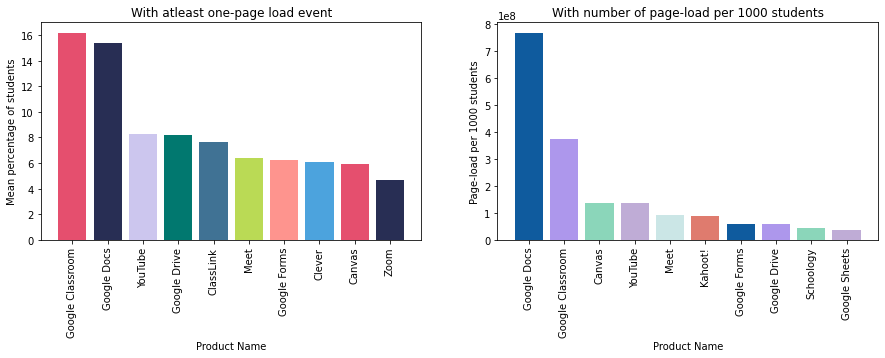

In [50]:
df_engagement.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(df_engagement, df_products, on= "LP ID")
m=merged.groupby("Product Name")["pct_access"].mean().sort_values(ascending=False).head(10)

df_engagement.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(df_engagement, df_products, on= "LP ID")
n=merged.groupby("Product Name")["engagement_index"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.bar(m.index, m.values, color=["#e54f6e","#282e54","#ccc6ee","#01786f","#407294","#bada55","#fe948e","#4ca3dd"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Mean percentage of students')
plt.title("With atleast one-page load event")

plt.subplot(122)
plt.bar(n.index, n.values, color=["#0f5b9e", "#ad97ec", "#8bd6ba", "#bfacd6", "#cbe6e6", "#df7b6e"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Page-load per 1000 students')
plt.title("With number of page-load per 1000 students")

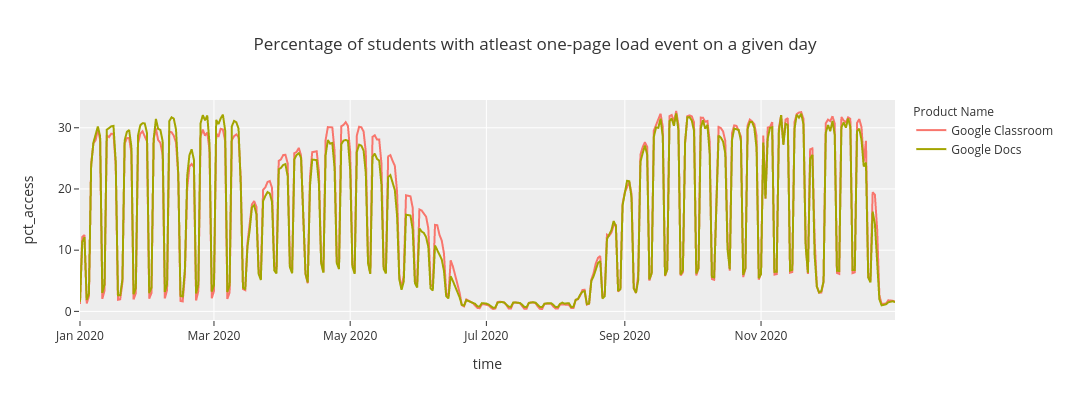

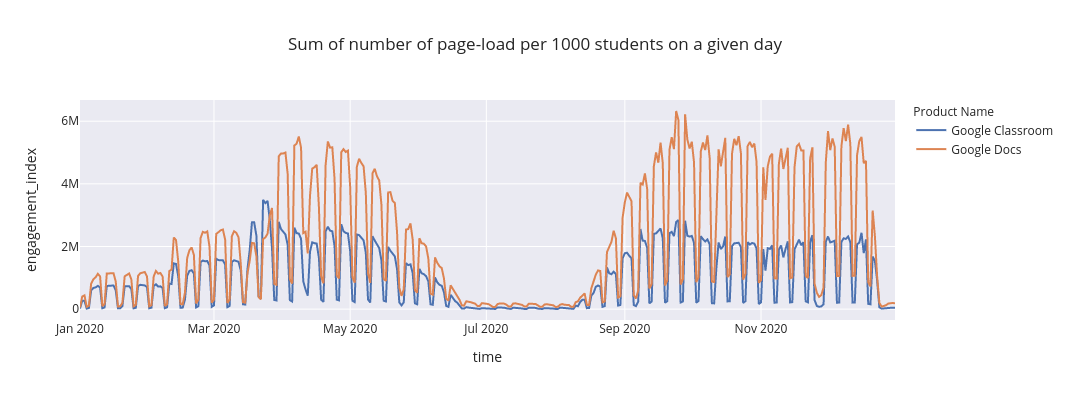

In [51]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly
import plotly.graph_objects as go
import plotly.express as px

class_doc=merged[(merged["Product Name"]=="Google Classroom")|(merged["Product Name"]=="Google Docs")]
pct=class_doc.groupby(["time", "Product Name"])["pct_access"].mean().to_frame().reset_index()
eng=class_doc.groupby(["time", "Product Name"])["engagement_index"].sum().to_frame().reset_index()
# plot
fig = px.line(pct, x="time", y="pct_access", color='Product Name',title='Percentage of students with atleast one-page load event on a given day',
              template="ggplot2", width=800, height=400)
fig.show()

fig = px.line(eng, x="time", y="engagement_index",title='Sum of number of page-load per 1000 students on a given day', color='Product Name',
              template="seaborn", width=800, height=400)
fig.show()

We can see the highest peek in May because school is winding up for summer. Summer vacation or summer break is a school break in summer between school years and the break in the school academic year. Students are typically off between eight and nine weeks, but not staff, depending on the country and district. In the United States, summer break is approximately two and a half months, with students typically finishing the school year between late-May and late-June and starting the new year between early-August and early-September. 
That's why there has been a decline in the engagement index and  the access percentage between may and september. 

In [52]:
df_engagement

,time,LP ID,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345
...,...,...,...,...,...
22324185,2020-12-31,32213.0,1.69,587.06,5802
22324186,2020-12-31,23644.0,0.05,0.50,5802
22324187,2020-12-31,16164.0,0.05,1.00,5802
22324188,2020-12-31,85975.0,0.10,87.56,5802


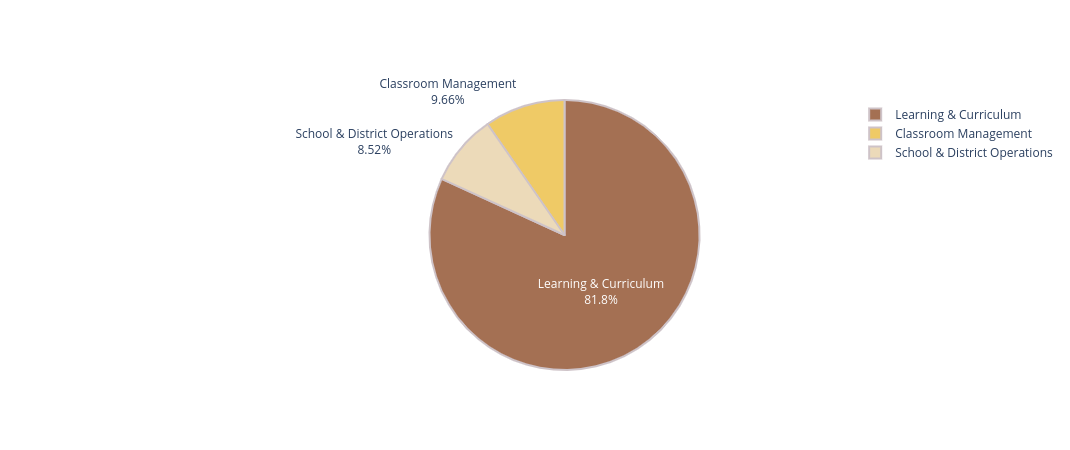

In [53]:
df_products["Basic function"]= df_products["Primary Essential Function"].str.extract('(LC|CM|SDO)')
function_dict ={'LC' : 'Learning & Curriculum', 'CM' : 'Classroom Management', 'SDO' : 'School & District Operations'}
df_products['Basic_function_full_form'] = df_products["Basic function"].map(function_dict)
df_products["Sub Basic function"]= df_products["Primary Essential Function"].str.lstrip('(LCCMSDO')
df_products = df_products.replace('-', '', regex=True)

colors = ['#a47053', '#efca66', '#ecdab9']
fig = go.Figure(data=[go.Pie(labels=df_products["Basic_function_full_form"].value_counts().index, values=df_products["Basic_function_full_form"].value_counts().values)])
fig.update_traces(hoverinfo='label+value', textinfo='label+percent', textfont_size=12,
                  marker=dict(colors=colors, line=dict(color='#cec3c8', width=2)))
fig.show()

In [54]:
df_engagement['district_id'].head()

0    6345
1    6345
2    6345
3    6345
4    6345
Name: district_id, dtype: object

In [55]:
df_engagement["time"] = pd.to_datetime(df_engagement["time"])
df_engagement['day'] = df_engagement['time'].dt.day_name()
df_engagement['month'] = df_engagement['time'].dt.month_name()

In [56]:
df_engagement

,time,LP ID,pct_access,engagement_index,district_id,day,month
0,2020-01-01,92844.0,0.01,0.68,6345,Wednesday,January
1,2020-01-01,64838.0,0.01,0.68,6345,Wednesday,January
2,2020-01-01,94058.0,0.00,NaN,6345,Wednesday,January
3,2020-01-01,26488.0,0.03,26.21,6345,Wednesday,January
4,2020-01-01,32340.0,0.01,0.11,6345,Wednesday,January
...,...,...,...,...,...,...,...
22324185,2020-12-31,32213.0,1.69,587.06,5802,Thursday,December
22324186,2020-12-31,23644.0,0.05,0.50,5802,Thursday,December
22324187,2020-12-31,16164.0,0.05,1.00,5802,Thursday,December
22324188,2020-12-31,85975.0,0.10,87.56,5802,Thursday,December


In [57]:
df_engagement.describe()

,LP ID,pct_access,engagement_index
count,2.232365e+07,2.231074e+07,1.694578e+07
mean,5.470879e+04,5.042399e-01,1.676063e+02
std,2.647069e+04,3.180568e+00,1.682223e+03
min,1.000300e+04,0.000000e+00,1.000000e-02
25%,3.085100e+04,0.000000e+00,3.700000e-01
50%,5.500700e+04,2.000000e-02,1.920000e+00
75%,7.766000e+04,9.000000e-02,1.365000e+01
max,9.999100e+04,1.000000e+02,2.130455e+05


In [62]:
df = pd.merge(df_products,df_engagement,left_on = 'LP ID',right_on = 'LP ID')
df.head()

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic function,Basic_function_full_form,Sub Basic function,time,pct_access,engagement_index,district_id,day,month
0,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-02,0.11,7.03,6345,Thursday,January
1,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-03,0.01,0.11,6345,Friday,January
2,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-06,0.05,4.76,6345,Monday,January
3,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-07,0.12,14.74,6345,Tuesday,January
4,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-09,0.01,0.11,6345,Thursday,January


In [63]:
df_districts['district_id'] = df_districts['district_id'].astype(str)
data = pd.merge(df,df_districts,left_on = 'district_id', right_on = 'district_id')

In [64]:
data.head()

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic function,Basic_function_full_form,Sub Basic function,time,pct_access,engagement_index,district_id,day,month,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio
0,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-02,0.01,0.05,9812,Thursday,January,Utah,Suburb,0.1,0.3,0.28
1,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-03,0.01,0.08,9812,Friday,January,Utah,Suburb,0.1,0.3,0.28
2,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-06,0.01,0.21,9812,Monday,January,Utah,Suburb,0.1,0.3,0.28
3,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-07,0.03,0.47,9812,Tuesday,January,Utah,Suburb,0.1,0.3,0.28
4,13117,SplashLearn,StudyPad Inc.,PreK12,LC Digital Learning Platforms,LC,Learning & Curriculum,Digital Learning Platforms,2020-01-08,0.00,NaN,9812,Wednesday,January,Utah,Suburb,0.1,0.3,0.28


In [70]:
def plot_bar(data:pd.DataFrame,col1:str,col2:str):
    df=data.sort_values(by=col1,ascending=False)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    ax=sns.barplot(df.index,df[col1],palette='YlGn',dodge=False)
    ax.set_xticklabels(df.index,rotation=80)
    plt.title(f'Distribution of {col1}')
    
    plt.subplot(1,2,2)
    ax=sns.barplot(df.index,df[col2],palette='YlOrBr',dodge=False)
    ax.set_xticklabels(df.index,rotation=80)
    plt.title(f'Distribution of {col2}')
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



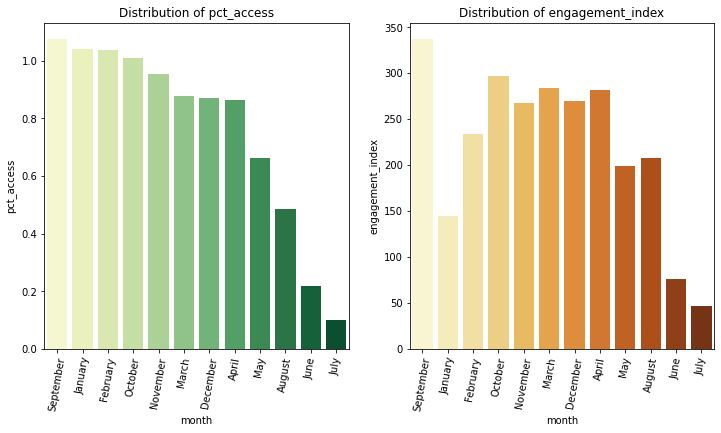

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



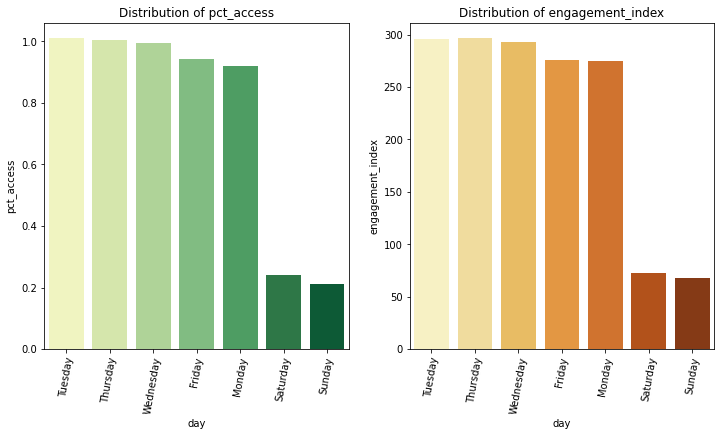

In [71]:
months = data.groupby('month').agg({'pct_access':'mean','engagement_index':'mean'})
days = data.groupby('day').agg({'pct_access':'mean','engagement_index':'mean'})
plot_bar(months,'pct_access','engagement_index')
plot_bar(days,'pct_access','engagement_index')

In [72]:
print("Bellow are all missing values of engagement dataframe:")
df_engagement.isnull().sum()

Bellow are all missing values of engagement dataframe:


time                      0
LP ID                   541
pct_access            13447
engagement_index    5378409
district_id               0
day                       0
month                     0
dtype: int64

In [73]:
df_engagement.duplicated().any()

False

In [74]:
# Deleting rows of missing values in these columns
df_engagement.dropna(subset=["engagement_index", "LP ID", "pct_access"], axis=0, inplace=True)
df_engagement.isnull().sum()

time                0
LP ID               0
pct_access          0
engagement_index    0
district_id         0
day                 0
month               0
dtype: int64

In [75]:
# Changing data type from 'object' to 'int64'
df_engagement["district_id"] = pd.to_numeric(df_engagement["district_id"])

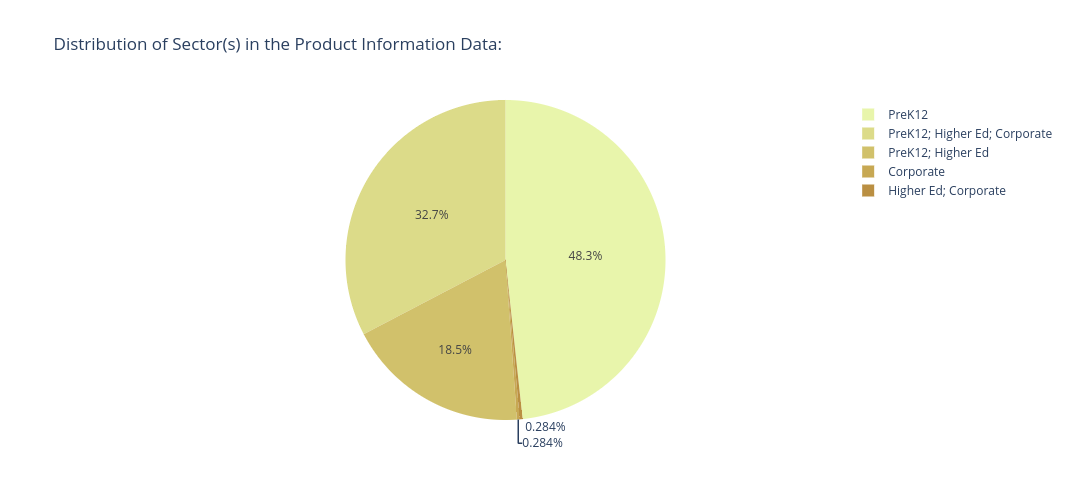

In [89]:

#Distribution of Sector(s) 
products_sec=df_products['Sector(s)'].value_counts().reset_index()

products_sec.columns = ['Sector(s)','percent']

products_sec['percent'] /= len(df_products)
fig = px.pie(
    products_sec, 
    names='Sector(s)', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.turbid,
    title='Distribution of Sector(s) in the Product Information Data:', 
    width=700,
    height=500
)
fig.show()